In [6]:
print('hello')

hello


In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


Average_temp = np.loadtxt('./city_temp_new.csv' ,dtype='float',skiprows=1 , delimiter=',' ,usecols=(6))

monthly , daily , anual = np.loadtxt('./city_temp_new.csv' ,dtype='float',skiprows=1 , delimiter=',' ,usecols=(3,4,5), unpack=True)

city = np.loadtxt('./city_temp_new.csv', dtype='str',usecols=(2), delimiter=',', skiprows=1)


In [8]:
keep = np.char.find(city , 'Nairobi') >= 0


index = np.arange(1, 8200+1)

In [9]:
Month_Nai = monthly[keep]
Daily_Nai = daily[keep]
Average_temp_Nai = Average_temp[keep]
Anual_Nai = anual[keep]

year = np.abs(Anual_Nai)==1995


Average_temp_Nai_1995 = Average_temp_Nai[year]
Month_Nai_1995 = Month_Nai[year]

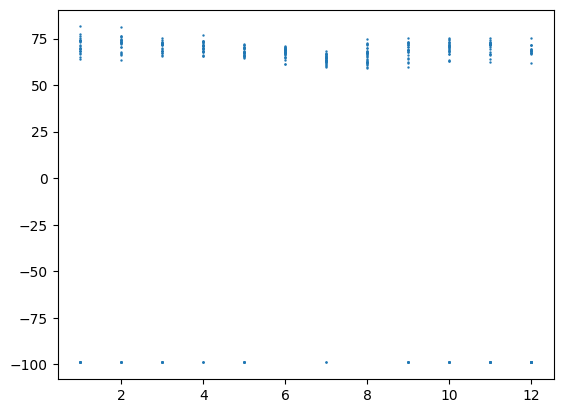

In [10]:
marker_sizes = np.random.randint(10, 100, size=100)

plt.scatter(Month_Nai_1995,Average_temp_Nai_1995,s=0.5)


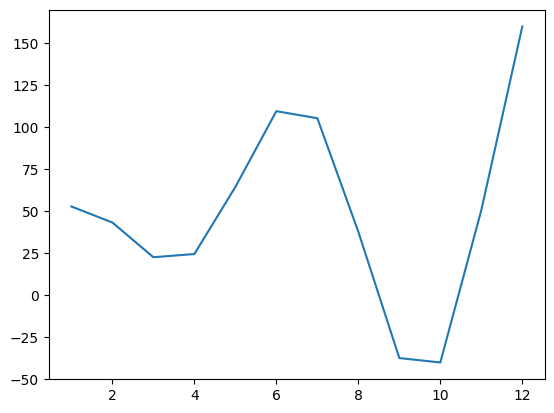

In [11]:
def curveline(a,t,b,c):
    return a * np.cos(t)*(2 * np.pi * t + b) + c

popt , pcov = curve_fit(curveline, Month_Nai_1995,Average_temp_Nai_1995)

plt.plot(Month_Nai_1995,curveline(popt[0],Month_Nai_1995,popt[1],popt[2]), alpha=1)